# PRELIMINARY DATA VISUALIZATION

In [24]:
# LIBRARIES IMPORT STATION

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

In [25]:
# DATASET LOADING

df = pd.read_csv("../../Data/BRFSS_2024_visualization.csv")
df_raw = pd.read_csv("../../Data/BRFSS_2024.csv", low_memory=False)

## FIGURE NO. 1 - Diabetes Distribution Visualization

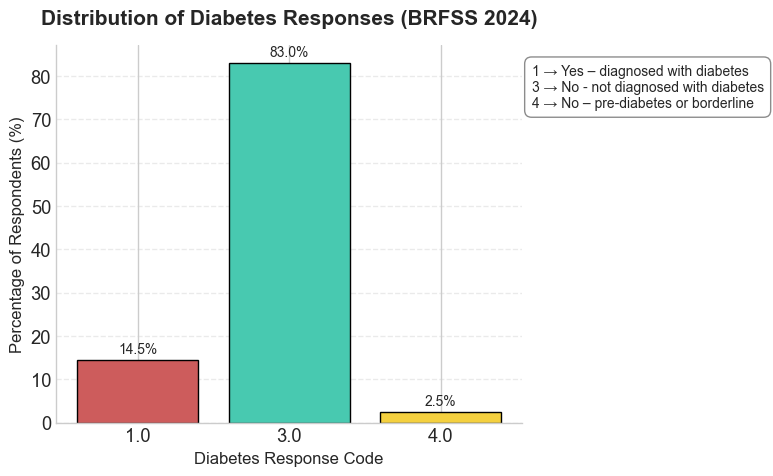

In [26]:
# 1. Compute frequencies and percentages directly (no filtering)
diabetes_counts = df['DIABETE4'].value_counts().sort_index()
diabetes_percent = (diabetes_counts / len(df)) * 100

# 2. Define code meanings (from BRFSS 2024 codebook)
diabetes_key = {
    1: "Yes – diagnosed with diabetes",
    3: "No - not diagnosed with diabetes",
    4: "No – pre-diabetes or borderline"
}

# 3. Make the plot prettier
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(8, 5))

colors = ['#CD5C5C', '#48C9B0', '#F4D03F', '#EC7063']  # nice, clean palette
bars = ax.bar(diabetes_percent.index.astype(str),
              diabetes_percent.values,
              color=colors[:len(diabetes_percent)],
              edgecolor='black')

# 4. Title and axes
ax.set_title("Distribution of Diabetes Responses (BRFSS 2024)",
             fontsize=15, weight='bold', pad=15)
ax.set_xlabel("Diabetes Response Code", fontsize=12)
ax.set_ylabel("Percentage of Respondents (%)", fontsize=12)
ax.spines[['top', 'right']].set_visible(False)

# 5. Add percentage labels
for bar in bars:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.8,
            f"{bar.get_height():.1f}%",
            ha='center', va='bottom', fontsize=10, weight='medium')

# 6. Add the key on the right side
legend_text = "\n".join([f"{k} → {v}" for k, v in diabetes_key.items()])
props = dict(boxstyle='round,pad=0.5', facecolor='white',
             edgecolor='gray', alpha=0.9)
ax.text(1.02, 0.95, legend_text, transform=ax.transAxes,
        fontsize=10, va='top', ha='left', bbox=props)

# 7. Display
ax.yaxis.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 8. Save figure to Visualizations folder
save_path = "../../Results/Visualizations/Preliminary_Visualization/diabetes_distribution_plot.png"
fig.savefig(save_path, dpi=300, bbox_inches="tight")


*Figure 1. Distribution of Diabetes Responses among U.S. Adults in BRFSS, 2024.
This bar chart shows the percentage of participants classified by their diabetes status according to the BRFSS, 2024 data. A majority of participants (83.0%) reported they did not have diabetes diagnosed, 14.5% reported having a diagnosis of diabetes, and 2.5% were classified as pre-diabetic or borderline. Data was obtained from self-reported response to the diabetes screening question, for which codes are: 1 = "Yes – diagnosed with diabetes," 3 = "No – not diagnosed with diabetes," and 4 = "No – pre-diabetes or borderline."*

## FIGURE NO. 2 - Missing Value Correlation Heatmaps

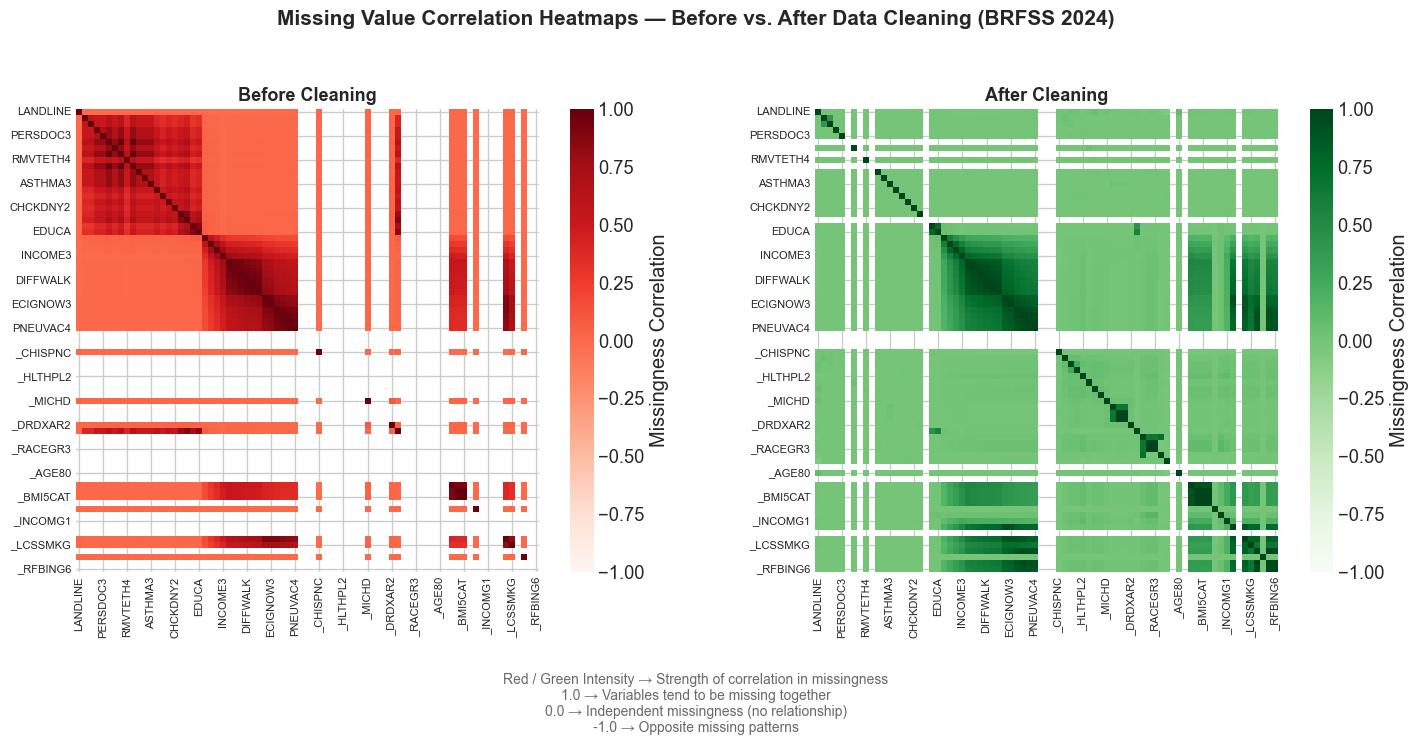

In [27]:
df_clean = df

# 1. Compute missingness correlation matrices manually for clarity
corr_raw = df_raw.isnull().corr()
corr_clean = df_clean.isnull().corr()

# 2. To reduce clutter, only show variables with >10% missing values in raw data
common_cols = corr_raw.columns.intersection(corr_clean.columns)
corr_raw = corr_raw.loc[common_cols, common_cols]
corr_clean = corr_clean.loc[common_cols, common_cols]

# 3. Create side-by-side heatmaps
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 4. Color scheme explanation: darker = higher correlation in missingness
sns.heatmap(corr_raw, cmap="Reds", cbar=True, square=True, ax=axes[0],
            vmin=-1, vmax=1, cbar_kws={'label': 'Missingness Correlation'})
axes[0].set_title("Before Cleaning", fontsize=13, weight='bold')
axes[0].tick_params(axis='x', labelrotation=90, labelsize=8)
axes[0].tick_params(axis='y', labelsize=8)

sns.heatmap(corr_clean, cmap="Greens", cbar=True, square=True, ax=axes[1],
            vmin=-1, vmax=1, cbar_kws={'label': 'Missingness Correlation'})
axes[1].set_title("After Cleaning", fontsize=13, weight='bold')
axes[1].tick_params(axis='x', labelrotation=90, labelsize=8)
axes[1].tick_params(axis='y', labelsize=8)

# 5. Shared figure title
plt.suptitle("Missing Value Correlation Heatmaps — Before vs. After Data Cleaning (BRFSS 2024)",
             fontsize=15, weight='bold', y=1.05)

# 6. Add a custom legend explaining color meaning
legend_text = (
    "Red / Green Intensity → Strength of correlation in missingness\n"
    "1.0 → Variables tend to be missing together\n"
    "0.0 → Independent missingness (no relationship)\n"
    "-1.0 → Opposite missing patterns"
)
plt.figtext(0.5, -0.15, legend_text, wrap=True, ha='center', fontsize=10, color='dimgray')

plt.tight_layout()
plt.show()

# 7. Save figure to Visualizations folder
save_path_1 = "../../Results/Visualizations/Preliminary_Visualization/missing-value_correlation_heatmap.png"
fig.savefig(save_path_1, dpi=300, bbox_inches="tight")

*Figure 2. Comparison of Missing Value Correlation Patterns Before and After Data Cleaning (BRFSS 2024).
These heatmaps plot pairwise missingness correlation of missing values between selected BRFSS 2024 variables before (left) and after (right) data cleaning. A cell indicates the correlation of missingness for two variables, with +1 indicating that both variables are missing together, 0 indicating independent missingness, and −1 indicating opposite missing patterns. Red intensity (pre cleaning) highlights strong clusters of missing correlation—which suggest systematic gaps in data—while green intensity (post cleaning) highlights the significant reduction in inter-variable relationships after imputation and record drop-out. This picture depicts improved completeness in the data and reduced bias caused by missing values.*

## FIGURE NO. 3 - Missingness Pie Chart Before vs After

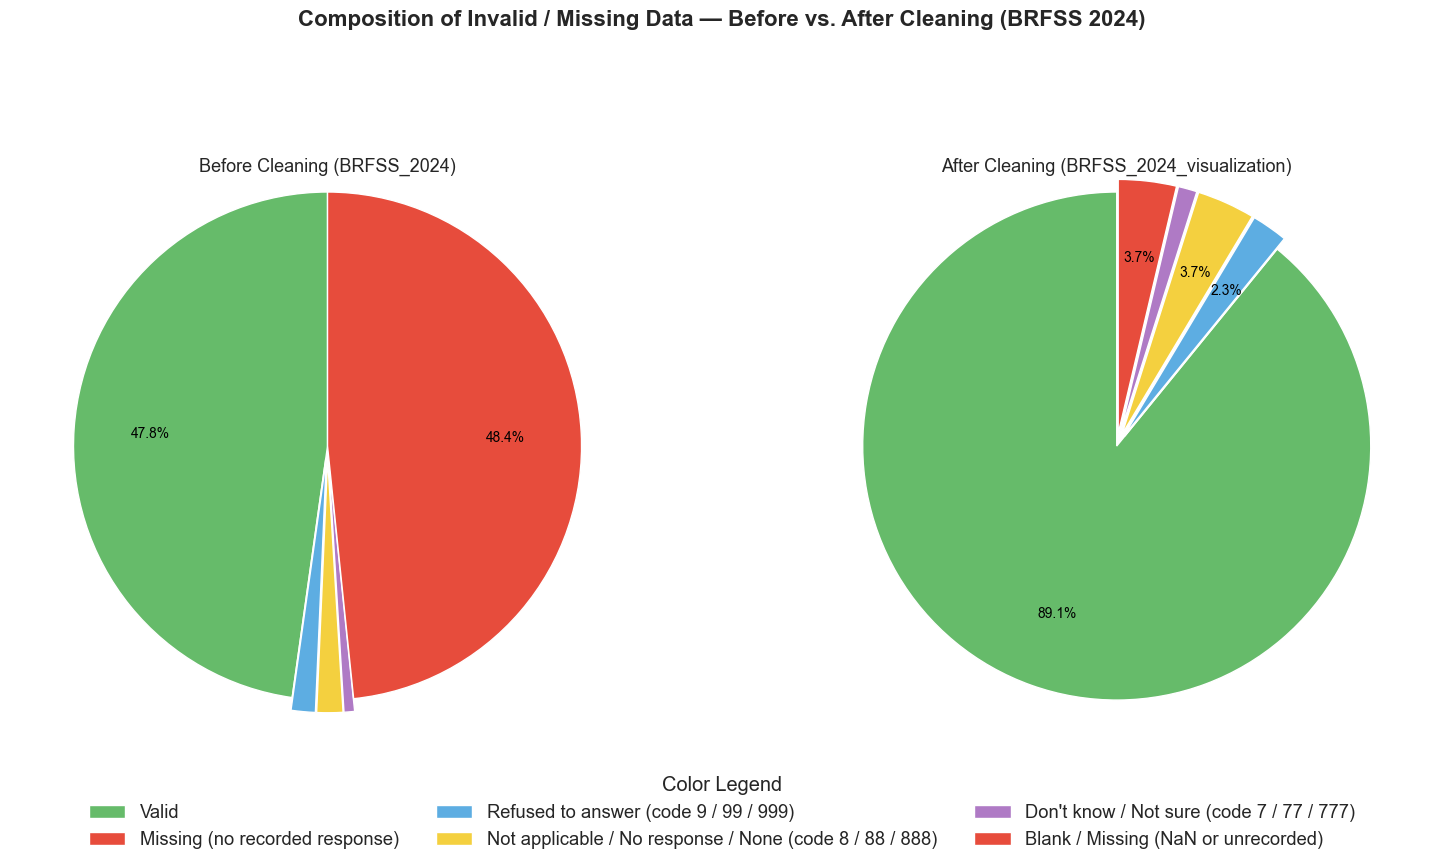

Before Cleaning Percentages:
 Blank / Missing (NaN or unrecorded)                        48.36
Valid                                                      47.78
Not applicable / No response / None (code 8 / 88 / 888)     1.66
Refused to answer (code 9 / 99 / 999)                       1.53
Don't know / Not sure (code 7 / 77 / 777)                   0.67
Name: proportion, dtype: float64

After Cleaning Percentages:
 Valid                                                      89.12
Not applicable / No response / None (code 8 / 88 / 888)     3.69
Blank / Missing (NaN or unrecorded)                         3.69
Refused to answer (code 9 / 99 / 999)                       2.30
Don't know / Not sure (code 7 / 77 / 777)                   1.19
Name: proportion, dtype: float64


In [28]:
df_before = df_raw
df_after = df
def classify_response(val):
    """Classify BRFSS numeric codes into categories."""
    if pd.isna(val):
        return "Blank / Missing (NaN or unrecorded)"
    elif val in [7, 77, 777]:
        return "Don't know / Not sure (code 7 / 77 / 777)"
    elif val in [8, 88, 888]:
        return "Not applicable / No response / None (code 8 / 88 / 888)"
    elif val in [9, 99, 999]:
        return "Refused to answer (code 9 / 99 / 999)"
    else:
        return "Valid"

# Flatten both datasets into one long vector of all responses
before_status = pd.Series(
    np.concatenate([df_before[col].apply(classify_response).values for col in df_before.columns])
)
after_status = pd.Series(
    np.concatenate([df_after[col].apply(classify_response).values for col in df_after.columns])
)

# 3. Compute category percentages
labels = [
    "Valid",
    "Missing (no recorded response)",
    "Refused to answer (code 9 / 99 / 999)",
    "Not applicable / No response / None (code 8 / 88 / 888)",
    "Don't know / Not sure (code 7 / 77 / 777)",
    "Blank / Missing (NaN or unrecorded)"
]

# Calculate percentages of each label
before_counts = before_status.value_counts(normalize=True) * 100
after_counts  = after_status.value_counts(normalize=True) * 100

# Add “Missing (no recorded response)” manually = cells dropped between before and after
missing_no_recorded = 100 - after_counts.sum()
if missing_no_recorded > 0:
    after_counts["Missing (no recorded response)"] = missing_no_recorded

# Ensure order and fill missing with 0
before_values = [before_counts.get(lbl, 0) for lbl in labels]
after_values  = [after_counts.get(lbl, 0)  for lbl in labels]


# 4. Define colors and label display
colors = [
    '#66BB6A',   # Green → Valid responses
    '#E74C3C',   # Red → Missing (no recorded response)
    '#5DADE2',   # Blue → Refused to answer
    '#F4D03F',   # Yellow → Not applicable / No response
    '#AF7AC5',   # Purple → Don't know / Not sure
    '#E74C3C'    # Gray → Blank / NaN
]

def autopct_func(pct):
    return ('%1.1f%%' % pct) if pct > 2 else ''  # Hide small ones


# 5. Plot before vs. after pies
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
titles = ['Before Cleaning (BRFSS_2024)', 'After Cleaning (BRFSS_2024_visualization)']
datasets = [before_values, after_values]

for ax, data, title in zip(axes, datasets, titles):
    explode = [0.05 if v < 5 else 0 for v in data]
    wedges, texts, autotexts = ax.pie(
        data,
        labels=None,                  # No outer labels
        colors=colors,
        startangle=90,
        autopct=autopct_func,         # Only inside % labels
        explode=explode,
        pctdistance=0.7,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )

    ax.set_title(title, fontsize=13, y=0.92)
    for t in autotexts:
        t.set_fontsize(10)
        t.set_color('black')


# 6. Global formatting
plt.suptitle("Composition of Invalid / Missing Data — Before vs. After Cleaning (BRFSS 2024)",
             fontsize=16, fontweight='bold', y=1.02)

plt.figlegend(
    labels,
    title="Color Legend",
    loc='lower center',
    bbox_to_anchor=(0.5, -0.05),
    ncol=3,
    frameon=False
)

plt.subplots_adjust(top=0.85, wspace=0.3)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])

plt.show()

# 7. Optional sanity check
print("Before Cleaning Percentages:\n", before_counts.round(2))
print("\nAfter Cleaning Percentages:\n", after_counts.round(2))

# 8. Save figure to Visualizations folder
save_path_2 = "../../Results/Visualizations/Preliminary_Visualization/missingness_pie_chart.png"
fig.savefig(save_path_2, dpi=300, bbox_inches="tight")


*Figure 3. Invalid and Missing Data Structure Before and After Cleaning (BRFSS 2024).
This chart shows the response validity and missingness categories breakdown in the BRFSS 2024 dataset before (left) and after (right) data cleaning. Before the cleaning, nearly half of the total responses (48.4%) were blank or unrecorded (NaN), while 47.8% were valid entries. After data cleaning, valid responses had increased immensely to 89.3%, which was a sign of improved data completeness and reliability. Minor residual proportions are those "Refused to answer," "Not applicable," or "Don't know/Not sure." These reflect the effectiveness of the cleaning process in eradicating invalid and missing values in variables.*

## FIGURE NO. 4 - Feature Retention Bar Plot

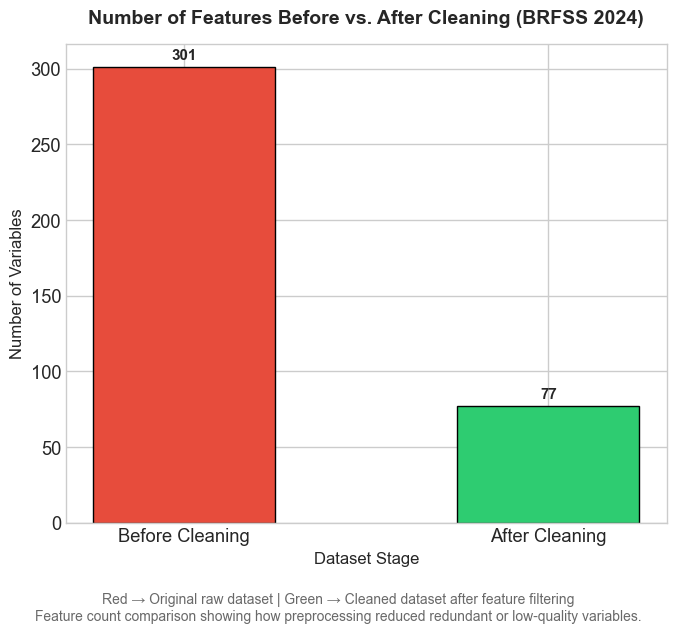

In [29]:
# Get feature counts (number of columns)
counts = [df_raw.shape[1], df_clean.shape[1]]
labels = ['Before Cleaning', 'After Cleaning']

# Define colors
colors = ['#E74C3C', '#2ECC71']  # red before, green after

# Create bar plot
fig4 = plt.figure(figsize=(7, 6))
bars = plt.bar(labels, counts, color=colors, width=0.5, edgecolor='black')

# Add title and labels
plt.title('Number of Features Before vs. After Cleaning (BRFSS 2024)',
          fontsize=14, weight='bold', pad=15)
plt.ylabel('Number of Variables', fontsize=12)
plt.xlabel('Dataset Stage', fontsize=12)

# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 3, f'{int(yval)}',
             ha='center', va='bottom', fontsize=11, weight='bold')

# Caption under plot
caption = (
    "Red → Original raw dataset | Green → Cleaned dataset after feature filtering\n"
    "Feature count comparison showing how preprocessing reduced redundant or low-quality variables."
)
plt.figtext(0.5, -0.05, caption, wrap=True, ha='center', fontsize=10, color='dimgray')

plt.tight_layout()
plt.show()

# Save figure to Visualizations folder
save_path_3 = "../../Results/Visualizations/Preliminary_Visualization/feature_retention_bar.png"
fig4.savefig(save_path_3, dpi=300, bbox_inches="tight")

*Figure 4. Reduction in Number of Features Prior and Post Data Cleaning (BRFSS 2024).
This bar chart demonstrates the number of variables retained from the BRFSS 2024 data before and after preprocessing. The raw data contained 301 variables at the beginning, which were reduced to 79 once data cleaning and feature filtering took place. Trimming depicts removal of duplicated, low-quality, or very missing variables to improve data quality and analysis efficiency. Red marks the original raw data, and green marks the cleaned data.*

## FIGURE NO. 5 - Faceted Bar Plot Grid - Demographics & Lifestyles vs. Diabetes 

/var/folders/1l/dzhvlzcx0k57wvcl_4q0dhlc0000gn/T/ipykernel_4208/564351802.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/var/folders/1l/dzhvlzcx0k57wvcl_4q0dhlc0000gn/T/ipykernel_4208/564351802.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/var/folders/1l/dzhvlzcx0k57wvcl_4q0dhlc0000gn/T/ipykernel_4208/564351802.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/var/folders/1l/dzhvlzcx0k57wvcl_4q0dhlc0000gn/T/ipykernel_4208/564351802.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. aft

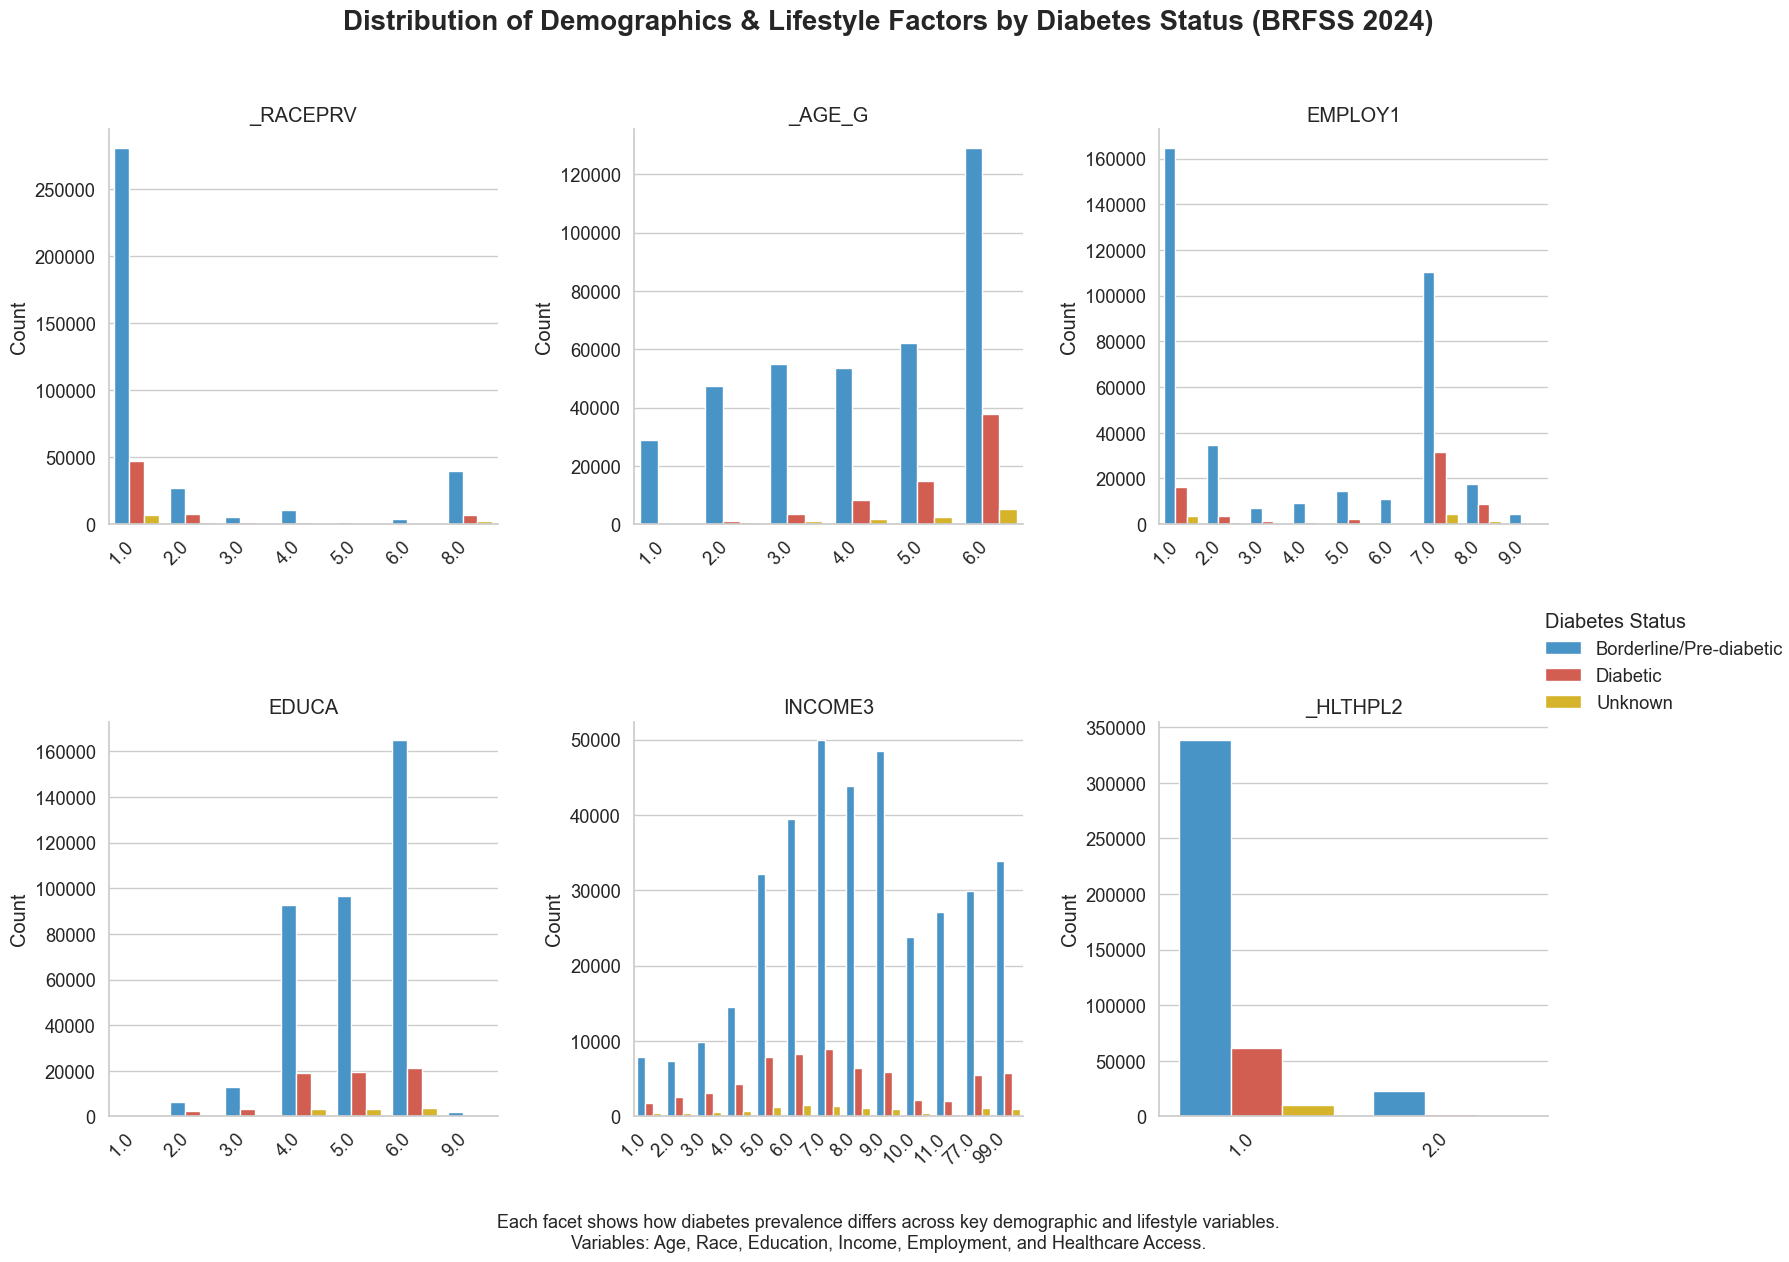

In [30]:
# Replace placeholder diabetes variable name if needed (e.g., DIABETE4, DIABETE3)
target_var = "DIABETE4" if "DIABETE4" in df.columns else "DIABETE3"

# Select variables of interest
vars_to_plot = ["_RACEPRV", "_AGE_G", "EMPLOY1", "EDUCA", "INCOME3", "_HLTHPL2"]

# Keep only the relevant columns
subset = df[vars_to_plot + [target_var]].copy()

# Convert Diabetes codes to readable labels
subset[target_var] = subset[target_var].map({
    1: "Diabetic",
    2: "Non-Diabetic",
    3: "Borderline/Pre-diabetic",
    4: "Unknown"
}).fillna("Unknown")

# Melt the dataset for seaborn FacetGrid
df_melted = subset.melt(id_vars=target_var, var_name="Variable", value_name="Category")
df_melted = df_melted.dropna(subset=["Category"])

# Set up aesthetics
sns.set(style="whitegrid", font_scale=1.2)

# Make each subplot larger (height=5, wider figure overall)
g = sns.catplot(
    data=df_melted,
    kind="count",
    x="Category",
    hue=target_var,
    col="Variable",
    col_wrap=3,
    height=5,        # increase subplot height
    aspect=1.2,      # widen each subplot
    sharex=False,
    sharey=False,
    palette=["#3498DB", "#E74C3C", "#F1C40F"]
)

# Improve labels and layout
for ax in g.axes.flat:
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Increase spacing between subplots
g.fig.subplots_adjust(hspace=0.5, wspace=0.35, top=0.9)

# Title
g.set_titles("{col_name}")
g.fig.suptitle(
    "Distribution of Demographics & Lifestyle Factors by Diabetes Status (BRFSS 2024)",
    fontsize=20, weight="bold", y=1
)

# Legend (default seaborn style, just repositioned + scaled)
g._legend.set_title("Diabetes Status")
g._legend.set_bbox_to_anchor((1.0, 0.5))   # move legend further right
g._legend._legend_box.align = "left"

# Adjust entire figure size (canvas expansion)
g.fig.set_size_inches(18, 12)  # width x height in inches (bigger canvas)

# Caption
plt.figtext(
    0.5, -0.03,
    "Each facet shows how diabetes prevalence differs across key demographic and lifestyle variables.\n"
    "Variables: Age, Race, Education, Income, Employment, and Healthcare Access.",
    wrap=True, ha="center", fontsize=13
)

plt.show()

# Save figure to Visualizations folder
save_path_4 = "../../Results/Visualizations/Preliminary_Visualization/demographics_vs_diabetes.png"
g.savefig(save_path_4, dpi=300, bbox_inches="tight")

*Figure 5. Distribution of Demographic and Lifestyle Factors by Diabetes Status (BRFSS 2024).
This multi-panel bar chart compares the pattern of diabetes prevalence varying by meaningful demographic and lifestyle-related variables in the BRFSS 2024 data, including race (_RACEPRV), age group (_AGE_G), employment status (EMPLOY1), educational level (EDUCA), income level (INCOME3), and health access (_HLTHPL2). Each panel displays the number of each category of variables by diabetes status—borderline/pre-diabetic (blue), diabetic (red), or unknown (yellow). The distributions reflect demographic variations in the prevalence of diabetes, with older age groups and lower levels of education or income having proportionally higher levels of diabetes.*

## FIGURE NO. 6 - Faceted Bar Plot Grid - Health & Behavioral Variables vs. Diabetes 

/var/folders/1l/dzhvlzcx0k57wvcl_4q0dhlc0000gn/T/ipykernel_4208/1030569248.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/var/folders/1l/dzhvlzcx0k57wvcl_4q0dhlc0000gn/T/ipykernel_4208/1030569248.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/var/folders/1l/dzhvlzcx0k57wvcl_4q0dhlc0000gn/T/ipykernel_4208/1030569248.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/var/folders/1l/dzhvlzcx0k57wvcl_4q0dhlc0000gn/T/ipykernel_4208/1030569248.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

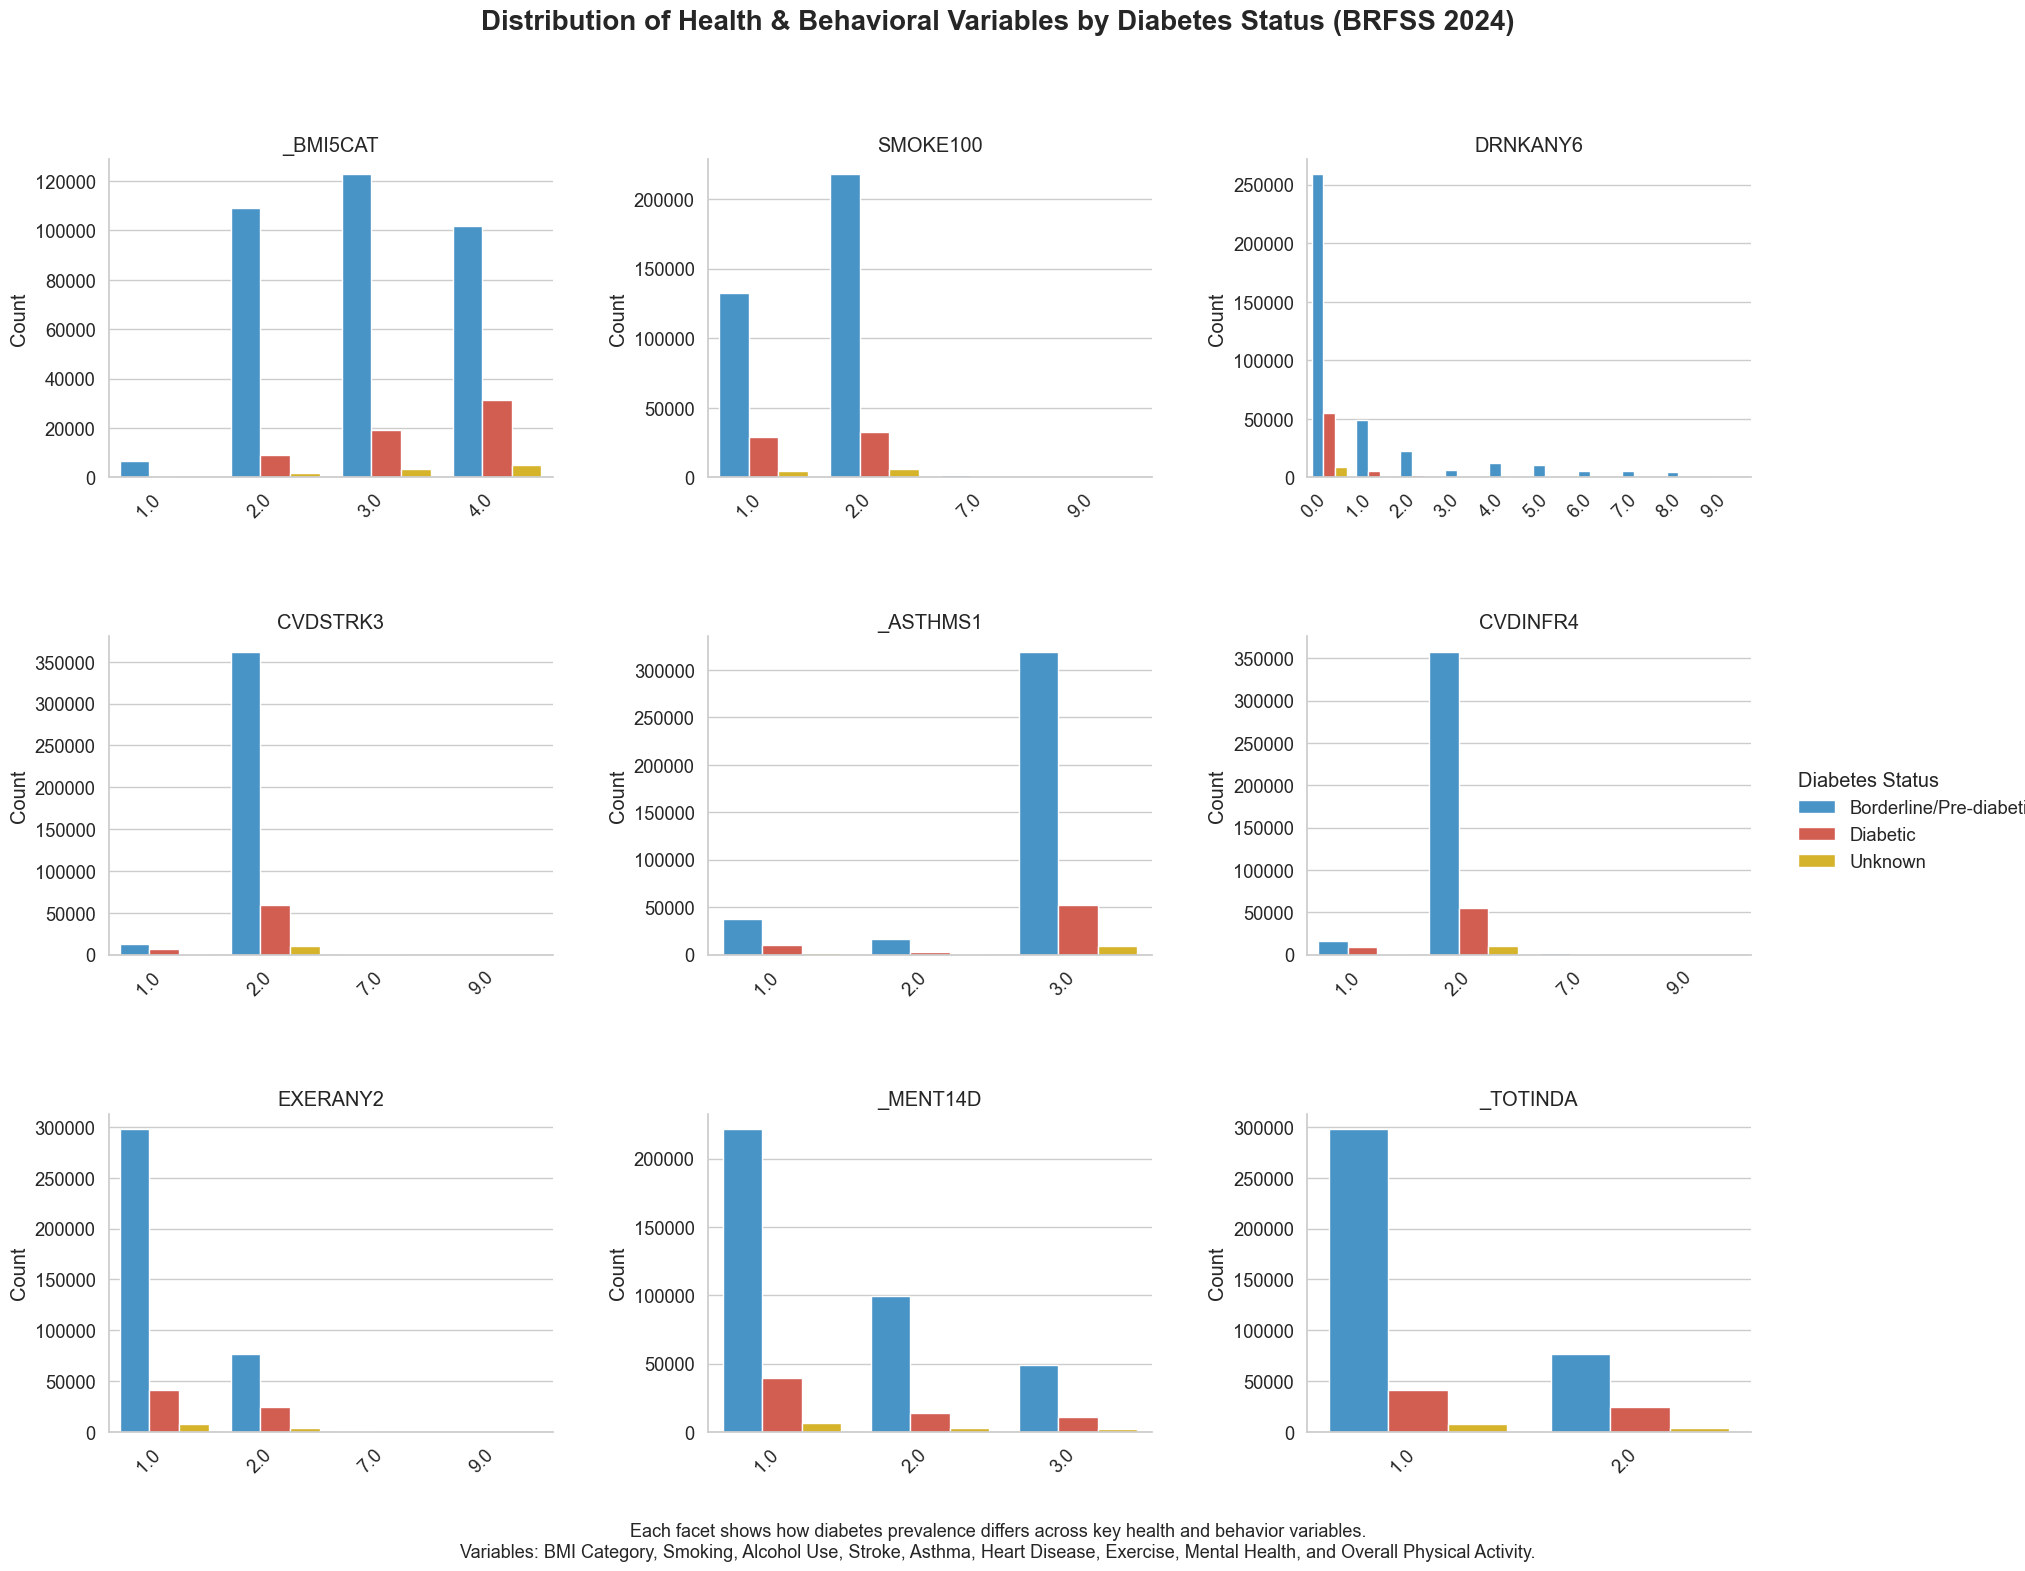

In [31]:
# Replace placeholder diabetes variable name if needed (e.g., DIABETE4, DIABETE3)
target_var = "DIABETE4" if "DIABETE4" in df.columns else "DIABETE3"

# Select variables of interest
vars_to_plot = ["_BMI5CAT", "SMOKE100", "DRNKANY6", "CVDSTRK3", "_ASTHMS1", "CVDINFR4", "EXERANY2", "_MENT14D", "_TOTINDA"]

# Keep only the relevant columns
subset = df[vars_to_plot + [target_var]].copy()

# Convert Diabetes codes to readable labels
subset[target_var] = subset[target_var].map({
    1: "Diabetic",
    2: "Non-Diabetic",
    3: "Borderline/Pre-diabetic",
    4: "Unknown"
}).fillna("Unknown")

# Melt the dataset for seaborn FacetGrid
df_melted = subset.melt(id_vars=target_var, var_name="Variable", value_name="Category")
df_melted = df_melted.dropna(subset=["Category"])

# Set up aesthetics
sns.set(style="whitegrid", font_scale=1.2)

# Make each subplot larger (height=5, wider figure overall)
g1 = sns.catplot(
    data=df_melted,
    kind="count",
    x="Category",
    hue=target_var,
    col="Variable",
    col_wrap=3,
    height=5,        # increase subplot height
    aspect=1.2,      # widen each subplot
    sharex=False,
    sharey=False,
    palette=["#3498DB", "#E74C3C", "#F1C40F"]
)

# Improve labels and layout
for ax in g1.axes.flat:
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Increase spacing between subplots
g1.fig.subplots_adjust(hspace=0.5, wspace=0.35, top=0.9)

# Title
g1.set_titles("{col_name}")
g1.fig.suptitle(
    "Distribution of Health & Behavioral Variables by Diabetes Status (BRFSS 2024)",
    fontsize=20, weight="bold", y=1
)

# Legend (default seaborn style, just repositioned + scaled)
g1._legend.set_title("Diabetes Status")
g1._legend.set_bbox_to_anchor((1.0, 0.5))   # move legend further right
g1._legend._legend_box.align = "left"

# Adjust entire figure size (canvas expansion)
g.fig.set_size_inches(18, 12)  # width x height in inches (bigger canvas)

# Caption
plt.figtext(
    0.5, -0.03,
"Each facet shows how diabetes prevalence differs across key health and behavior variables.\n"
    "Variables: BMI Category, Smoking, Alcohol Use, Stroke, Asthma, Heart Disease, Exercise, Mental Health, and Overall Physical Activity.",
    wrap=True, ha="center", fontsize=13
)

plt.show()

# Save figure to Visualizations folder
save_path_5 = "../../Results/Visualizations/Preliminary_Visualization/health_vs_diabetes.png"
g1.savefig(save_path_5, dpi=300, bbox_inches="tight")

*Figure 6. Distribution of Health and Behavioral Variable by Diabetes Status (BRFSS 2024).
This multi-panel bar chart shows diabetes prevalence by significant health and behavioral variables in the BRFSS 2024 dataset. Indicators vary from BMI category (_BMI5CAT), smoking (_SMOKE100), alcohol consumption (DRNKANY6), stroke history (CVDSTRK3), asthma diagnosis (_ASTHMS1), heart disease (CVDINFR4), physical activity (EXERANY2), mental health (_MENT14D), and overall inactivity (_TOTINDA). Each axis shows the number of respondents in each category of variables, by diabetes status—borderline/pre-diabetic (blue), diabetic (red), or unknown (yellow). Trends suggest that those with diabetes are also more likely to have increased BMI, reduced physical activity, and increased rates of cardiovascular or respiratory conditions.*

## FIGURE NO. 7 - Radar Chart: Health & Behavior Profiles — Borderline vs. Diabetic 

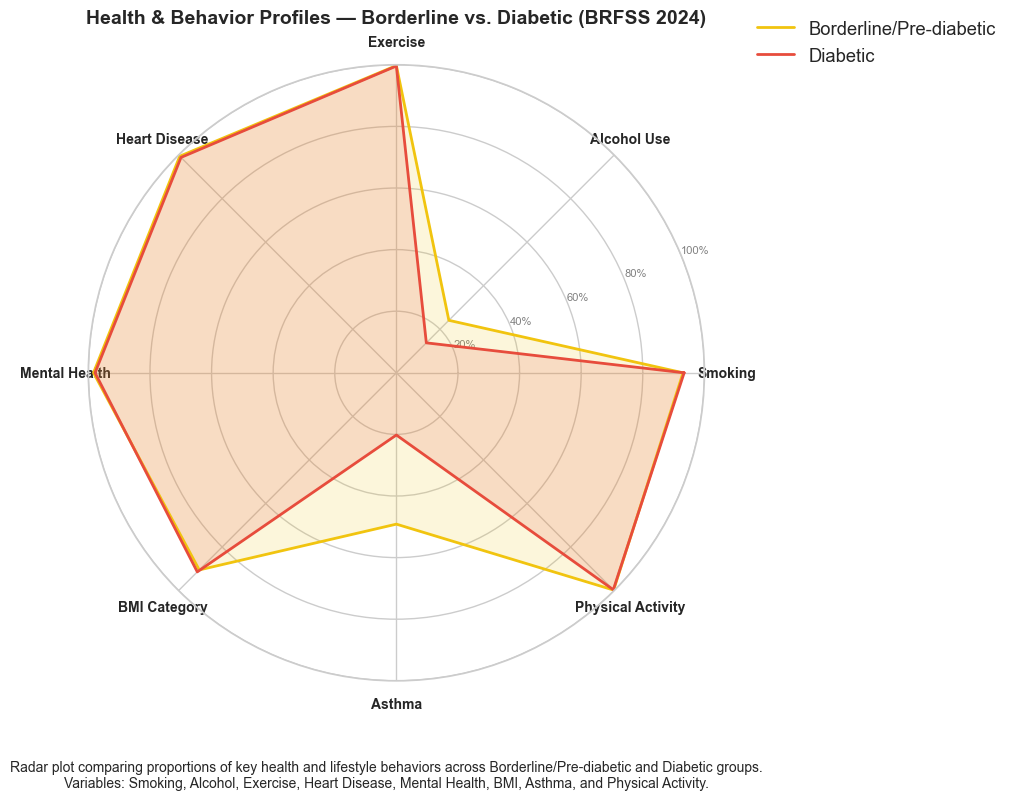

<Figure size 850x800 with 0 Axes>

In [32]:
# Replace placeholder diabetes variable name if needed
target_var = "DIABETE4" if "DIABETE4" in df.columns else "DIABETE3"

# Variables for radar chart
radar_vars = [
    "SMOKE100", "DRNKANY6", "EXERANY2", "CVDINFR4",
    "_MENT14D", "_BMI5CAT", "_AGE_G", "_TOTINDA"
]

# Keep subset
subset = df[[target_var] + radar_vars].copy()

# Map diabetes codes to readable labels
subset[target_var] = subset[target_var].map({
    1: "Diabetic",
    2: "Non-Diabetic",
    3: "Borderline/Pre-diabetic",
    4: "Unknown"
}).fillna("Unknown")

# Convert categorical health variables to numeric proportions per group
# For each diabetes group, calculate % of "positive" or "yes" responses
group_means = {}
for var in radar_vars:
    subset[var] = np.where(subset[var].isin([1, 2, 3, 4]), subset[var], np.nan)
    group_means[var] = subset.groupby(target_var)[var].apply(lambda x: x.notna().mean() * 100)

# Create dataframe for radar plot
radar_df = pd.DataFrame(group_means).fillna(0)

# Keep only Borderline and Diabetic (remove Non-Diabetic)
radar_df = radar_df.reindex(["Borderline/Pre-diabetic", "Diabetic"])

# Radar chart setup
labels = radar_df.columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Only two colors now: yellow & red
colors = ["#F1C40F", "#E74C3C"]

# Create figure
fig7 = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plot each diabetes group (no blue line)
for i, (group, row) in enumerate(radar_df.iterrows()):
    values = row.values.flatten().tolist()
    values += values[:1]  # close the loop
    ax.plot(angles, values, color=colors[i], linewidth=2, label=group)
    ax.fill(angles, values, color=colors[i], alpha=0.15)

# Customize axis and labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels([
    "Smoking", "Alcohol Use", "Exercise", "Heart Disease",
    "Mental Health", "BMI Category", "Asthma", "Physical Activity"
], fontsize=10, fontweight='bold')

ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"], color="gray", size=8)
ax.set_ylim(0, 100)

# Title and legend
plt.title("Health & Behavior Profiles — Borderline vs. Diabetic (BRFSS 2024)",
          size=14, fontweight='bold', pad=30)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.1))

# Caption
plt.figtext(
    0.5, -.02,
    "Radar plot comparing proportions of key health and lifestyle behaviors across Borderline/Pre-diabetic and Diabetic groups.\n"
    "Variables: Smoking, Alcohol, Exercise, Heart Disease, Mental Health, BMI, Asthma, and Physical Activity.",
    wrap=True, ha="center", fontsize=10
)
plt.figure(figsize=(8.5, 8))
plt.tight_layout()

plt.show()

# Save figure to Visualizations folder
save_path_6 = "../../Results/Visualizations/Preliminary_Visualization/radar_chart.png"
fig7.savefig(save_path_6, dpi=300, bbox_inches="tight")

*Figure 7. Borderline/Pre-diabetic and Diabetic Respondents Health and Behavior Comparison Profiles (BRFSS 2024).
This radar graph shows relative ratios of significant lifestyle and health factors in Borderline/Pre-diabetic (yellow) and Diabetic (red) groups based on 2024 BRFSS. Smoking, alcohol use, physical activity, exercise, asthma, BMI category, mental health, and heart disease are compared. Diabetic patients have higher heart disease rates, poorer mental health, higher BMI, and lower physical activity and exercise compared to borderline/pre-diabetic patients.*

Note: Use this radar plot only for exploratory visualization of multivariate health behavior patterns, and not for quantitative inference.